# Data preperation

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
#Read CSV file 
df_audio_features = pd.read_csv("/content/drive/MyDrive/df_audio_features_5000")


In [110]:
#remove whitespace from coloumn names
df_audio_features.columns  = df_audio_features.columns.str.replace("^[ ]+|[ ]+$", "", regex=True)  


In [111]:
# drop col "type", "id" and "html" 
df_audio_features = df_audio_features.drop(['type', 'id', 'html'], axis = 1)
df_audio_features.shape

(5235, 15)

In [112]:
# change index name  
df_audio_features.set_index(["name", "artist"], inplace=True) 
df_audio_features

danceability  \
name                                               artist                                                           
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                            0.6580   
Saudade De Bahia                               ... Antônio Carlos Jobim                                    0.7420   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                        0.8510   
Mulher Eu Sei                                  ... Chico César                                             0.7050   
Rosa Morena                                    ... Kurt Elling                                             0.6510   
...                                                                                                           ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                                0.2020   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                          0.1880   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold Schoenberg                                       0.0596   
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                          0.1330   
Ravel: Boléro, M. 81                           ... Maurice Ravel                                           0.3540   

                                                                                                      energy  \
name                                               artist                                                      
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                      0.25900   
Saudade De Bahia                               ... Antônio Carlos Jobim                              0.39900   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                  0.73000   
Mulher Eu Sei                                  ... Chico César                                       0.05020   
Rosa Morena                                    ... Kurt Elling                                       0.11900   
...                                                                                                      ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                          0.06940   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                    0.10100   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold Schoenberg                                 0.00093   
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                    0.02080   
Ravel: Boléro, M. 81                           ... Maurice Ravel                                     0.04870   

                                                                                                     key  \
name                                               artist                                                  
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                       11   
Saudade De Bahia                               ... Antônio Carlos Jobim                                2   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                    2   
Mulher Eu Sei                                  ... Chico César                                         4   
Rosa Morena                                    ... Kurt Elling                                         6   
...                                                                                                  ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                            3   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                      6   
Schoenberg: 5 Orchestral Pieces, Op. 16: N

In [113]:
# removing outliers from the complete dataset
from scipy import stats
df_audio_filtered = df_audio_features[(np.abs(stats.zscore(df_audio_features))< 3).all(axis=1)]
df_audio_filtered.shape

(4747, 13)

**Assuming number of clusters = 30 **

Using **min_max** scaler scaling the dataset 


In [114]:
# 1. import the transformer
from sklearn.preprocessing import MinMaxScaler

# 2. Initialise and fit the transformer and transform the data
df_audio_filtered_minmax = MinMaxScaler().fit_transform(df_audio_filtered)

# 3. convert scaled data into dataframe
scaled_audio_df = pd.DataFrame(df_audio_filtered_minmax, index=df_audio_filtered.index,
             columns=df_audio_filtered.columns)

scaled_audio_df

danceability  \
name                                               artist                                                           
Saudade De Bahia                               ... Antônio Carlos Jobim                                  0.751491   
Mulher Eu Sei                                  ... Chico César                                           0.710625   
Rosa Morena                                    ... Kurt Elling                                           0.650983   
Desafinado                                     ... Stan Getz                                             0.446653   
Madalena                                       ... Maria Gasolina                                        0.677491   
...                                                                                                           ...   
Elgar: Enigma Variations, Op. 36: XV. EDU (Fina... Edward Elgar                                          0.093218   
Also sprach Zarathustra, Op.30, TrV 176: Prelud... Richard Strauss                                       0.058979   
Symphony No. 3 - "Chant de la nuit", Op. 27: La... Karol Szymanowski                                     0.047935   
Don Giovanni, K.527: Overture                  ... Wolfgang Amadeus Mozart                               0.362713   
Music for Strings, Percussion and Celesta, BB 1... Béla Bartók                                           0.358295   

                                                                                                       energy  \
name                                               artist                                                       
Saudade De Bahia                               ... Antônio Carlos Jobim                              0.398807   
Mulher Eu Sei                                  ... Chico César                                       0.049313   
Rosa Morena                                    ... Kurt Elling                                       0.118250   
Desafinado                                     ... Stan Getz                                         0.145303   
Madalena                                       ... Maria Gasolina                                    0.206425   
...                                                                                                       ...   
Elgar: Enigma Variations, Op. 36: XV. EDU (Fina... Edward Elgar                                      0.252516   
Also sprach Zarathustra, Op.30, TrV 176: Prelud... Richard Strauss                                   0.300612   
Symphony No. 3 - "Chant de la nuit", Op. 27: La... Karol Szymanowski                                 0.230472   
Don Giovanni, K.527: Overture                  ... Wolfgang Amadeus Mozart                           0.173359   
Music for Strings, Percussion and Celesta, BB 1... Béla Bartók                                       0.123260   

                                                                                                          key  \
name                                               artist                                                       
Saudade De Bahia                               ... Antônio Carlos Jobim                              0.181818   
Mulher Eu Sei                                  ... Chico César                                       0.363636   
Rosa Morena                                    ... Kurt Elling                                       0.545455   
Desafinado                                     ... Stan Getz                                         0.272727   
Madalena                                       ... Maria Gasolina                                    1.000000   
...                                                                                                       ...   
Elgar: Enigma Variations, Op. 36: XV. EDU (Fina... Edward Elgar                                      0.636364   
Also sprach Zarathustra, Op.30, TrV 176: Prelud... Richard Strauss                          

In [115]:
#KMeans Cluster
# 1. import the module for KMeans
from sklearn.cluster import KMeans

# 2. initialise anf fit the model data
df_audio_filtered_Kmeans = KMeans(n_clusters = 30).fit(df_audio_filtered_minmax) # pass your scaled data here
print(df_audio_filtered_Kmeans)

# 3. obtain the clusters for each datapoint 
cluster_minmax = df_audio_filtered_Kmeans.labels_

# 4. and merge it into the dataframe of scaled data
scaled_audio_df["cluster_minmax"] = cluster_minmax

scaled_audio_df.head()

KMeans(n_clusters=30)


danceability  \
name                                               artist                                                           
Saudade De Bahia                               ... Antônio Carlos Jobim                                  0.751491   
Mulher Eu Sei                                  ... Chico César                                           0.710625   
Rosa Morena                                    ... Kurt Elling                                           0.650983   
Desafinado                                     ... Stan Getz                                             0.446653   
Madalena                                       ... Maria Gasolina                                        0.677491   

                                                                                                       energy  \
name                                               artist                                                       
Saudade De Bahia                               ... Antônio Carlos Jobim                              0.398807   
Mulher Eu Sei                                  ... Chico César                                       0.049313   
Rosa Morena                                    ... Kurt Elling                                       0.118250   
Desafinado                                     ... Stan Getz                                         0.145303   
Madalena                                       ... Maria Gasolina                                    0.206425   

                                                                                                          key  \
name                                               artist                                                       
Saudade De Bahia                               ... Antônio Carlos Jobim                              0.181818   
Mulher Eu Sei                                  ... Chico César                                       0.363636   
Rosa Morena                                    ... Kurt Elling                                       0.545455   
Desafinado                                     ... Stan Getz                                         0.272727   
Madalena                                       ... Maria Gasolina                                    1.000000   

                                                                                                     loudness  \
name                                               artist                                                       
Saudade De Bahia                               ... Antônio Carlos Jobim                              0.526649   
Mulher Eu Sei                                  ... Chico César                                       0.341579   
Rosa Morena                                    ... Kurt Elling                                       0.284322   
Desafinado                                     ... Stan Getz                                         0.362390   
Madalena                                       ... Maria Gasolina                                    0.486921   

                                                                                                     mode  \
name                                               artist                                                   
Saudade De Bahia                               ... Antônio Carlos Jobim                               1.0   
Mulher Eu Sei                                  ... Chico César                                        1.0   
Rosa Morena                                    ... Kurt Elling                                        1.0   
Desafinado                                     ... Stan Getz                                          1.0   
Madalena                                       ... Maria Gasolina                                     0.0   

                                                                                                     speechiness  \
name                     

In [116]:
# centroid
centroids_minmax = df_audio_filtered_Kmeans.cluster_centers_
centroids_minmax = pd.DataFrame(centroids_minmax)
centroids_minmax.head()

0         1         2         3             4         5         6   \
0  0.254419  0.935759  0.720412  0.734265 -7.771561e-16  0.383818  0.014971   
1  0.542693  0.722728  0.733171  0.739224  1.000000e+00  0.101699  0.107959   
2  0.401652  0.208385  0.208727  0.447593  1.000000e+00  0.081817  0.870810   
3  0.312946  0.153249  0.534591  0.290270 -1.110223e-15  0.077837  0.921343   
4  0.246480  0.891800  0.134328  0.668803  1.000000e+00  0.275358  0.012250   

         7         8         9         10        11        12  
0  0.112224  0.269867  0.179834  0.489393  0.376714  0.443396  
1  0.036609  0.270370  0.348023  0.497097  0.339970  0.490458  
2  0.036806  0.220551  0.268481  0.430895  0.336206  0.372000  
3  0.888542  0.184336  0.152713  0.373183  0.377890  0.405660  
4  0.830434  0.298744  0.244814  0.505022  0.350623  0.449627

0         1         2             3             4         5   \
0  0.000000  1.120062  1.656670  1.545378e+00  1.372367e+00  1.538793   
1  1.120062  0.000000  1.119869  1.753730e+00  1.078274e+00  0.894150   
2  1.656670  1.119869  0.000000  1.375058e+00  1.403010e+00  0.630129   
3  1.545378  1.753730  1.375058  2.980232e-08  1.662481e+00  1.595812   
4  1.372367  1.078274  1.403010  1.662481e+00  2.980232e-08  1.225609   

         6         7         8         9   ...        20        21        22  \
0  0.871200  0.809985  0.851622  1.438043  ...  1.383122  1.280822  1.413320   
1  1.126840  1.105352  1.424687  0.769642  ...  0.730742  0.604161  0.940626   
2  1.663999  1.529101  1.735549  1.123487  ...  1.208688  0.978705  1.238739   
3  1.627674  1.569060  1.300835  1.897457  ...  1.943324  1.787200  1.976096   
4  1.691947  1.516240  1.015282  1.110189  ...  1.082530  0.931212  1.143407   

         23        24        25        26        27        28        29  
0  1.267408  0.934419  1.223091  0.730395  0.847603  1.056746  1.490840  
1  0.650264  1.278270  1.401366  1.342768  1.262256  1.281086  0.848503  
2  1.338147  1.637084  1.021294  1.843203  1.617200  1.483888  0.587322  
3  1.935891  1.216315  0.988306  1.313628  1.658920  1.618089  1.384584  
4  1.295268  1.213549  1.665290  1.252842  1.583094  1.510397  1.454024  

[5 rows x 30 columns]

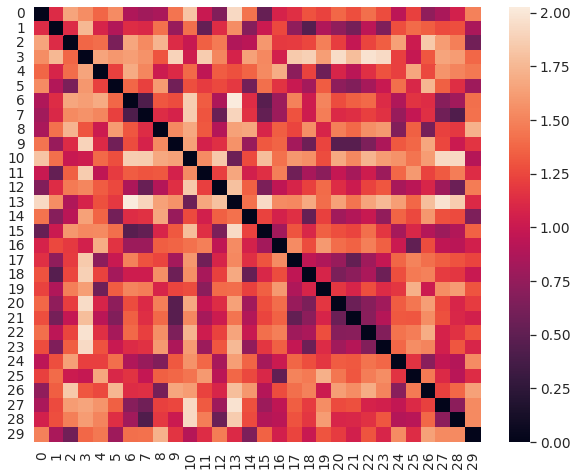

In [117]:
from sklearn.metrics import pairwise_distances
# Euclidean (by default)
euclidean_distance_minmax = pd.DataFrame(pairwise_distances(centroids_minmax), index=centroids_minmax.index,
                                  columns=centroids_minmax.index)


fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(euclidean_distance_minmax)
euclidean_distance_minmax.head()

In [118]:
df_audio_filtered_Kmeans.inertia_

1106.5308863562768

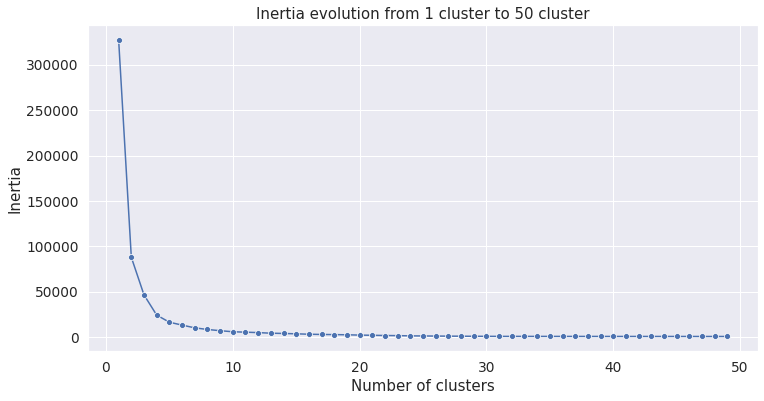

In [119]:
max_k = 50
inertia = []

for k in range(1, max_k): 
    inertia.append(KMeans(n_clusters=k).fit(scaled_audio_df).inertia_)

fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Inertia evolution from 1 cluster to {max_k} cluster')
sns.lineplot(x=range(1, max_k), y=inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Checking correlation between features

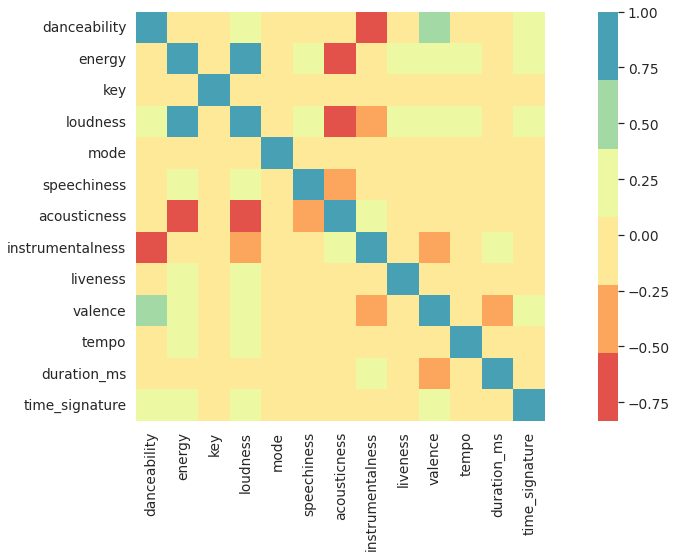

In [120]:
# creating a correlation matrix
corr = df_audio_filtered.corr()

# plotting the heatmap
f, ax = plt.subplots(figsize=(15,8))
cmap = sns.color_palette("Spectral")

sns.heatmap(corr,cmap = cmap, square=True, linecolor='white', vmax=1.0, annot=False,);
plt.tight_layout()

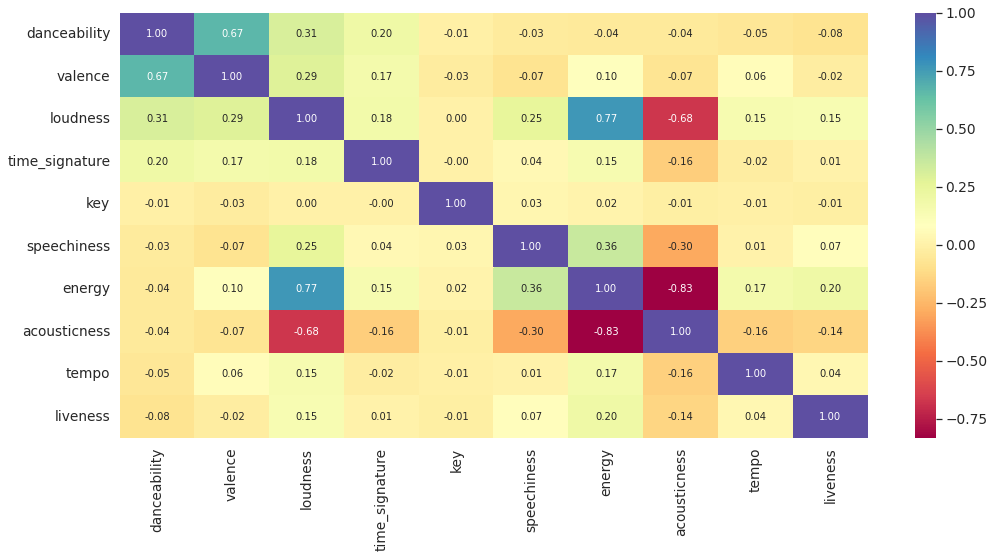

In [121]:
k = 10

# finding the most correlated variables
cols = corr.nlargest(k, 'danceability')['danceability'].index
cm = np.corrcoef(df_audio_filtered[cols].values.T)

#plotting the heatmap
f, ax = plt.subplots(figsize=(15,8))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cmap = "Spectral", cbar=True, annot=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.tight_layout()

**Model_1 **


Now considered number of clusters = 5

KMeans(n_clusters=5)


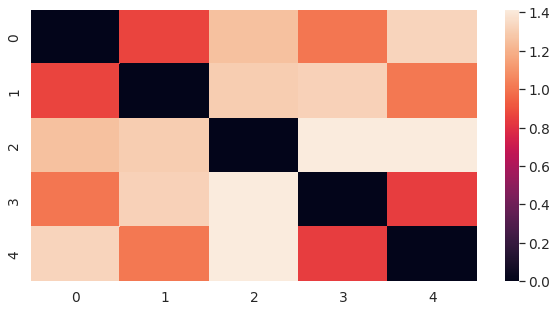

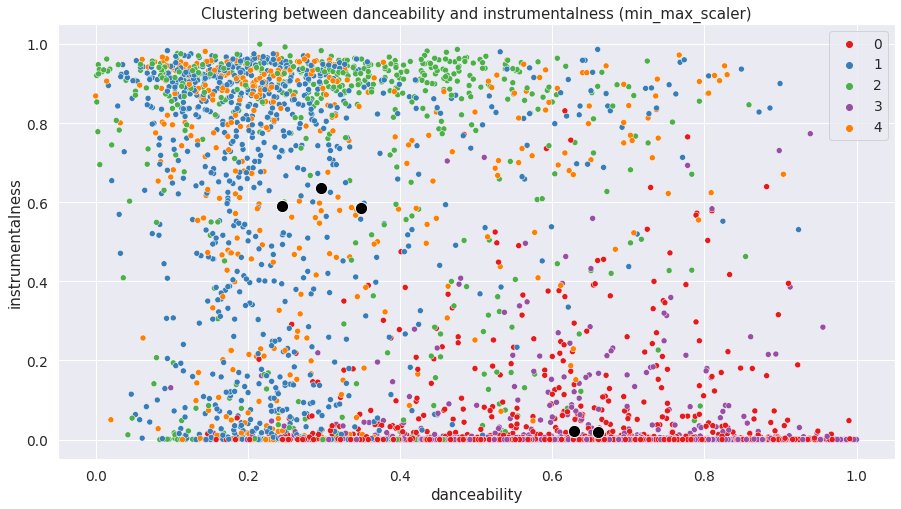

In [122]:
# danceability and instrumentalness

#KMeans minmax scaler
from sklearn.cluster import KMeans
df_audio_filtered_Kmeans_new = KMeans(n_clusters = 5).fit(df_audio_filtered_minmax)
print(df_audio_filtered_Kmeans_new)

scaled_audio_df["cluster_new_minmax"] = df_audio_filtered_Kmeans_new.labels_
scaled_audio_df.head()

# centroid

columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']
centroids_new_minmax = df_audio_filtered_Kmeans_new.cluster_centers_
centroids_new_minmax = pd.DataFrame(centroids_new_minmax)
centroids_new_minmax.columns = columns
centroids_new_minmax.head()
# detemining eucledian distance
from sklearn.metrics import pairwise_distances

# Euclidean (by default)
euclidean_distance_new_minmax = pd.DataFrame(pairwise_distances(centroids_new_minmax), index=centroids_new_minmax.index,
                                  columns=centroids_new_minmax.index)


fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(euclidean_distance_new_minmax)

# dancability and instrumentalness -minmax graph
fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(data= scaled_audio_df , x='danceability', y='instrumentalness', hue='cluster_new_minmax', palette='Set1')
sns.scatterplot(data=centroids_new_minmax, x='danceability', y='instrumentalness', color='black', s=150)
plt.title("Clustering between danceability and instrumentalness (min_max_scaler)")
plt.show()


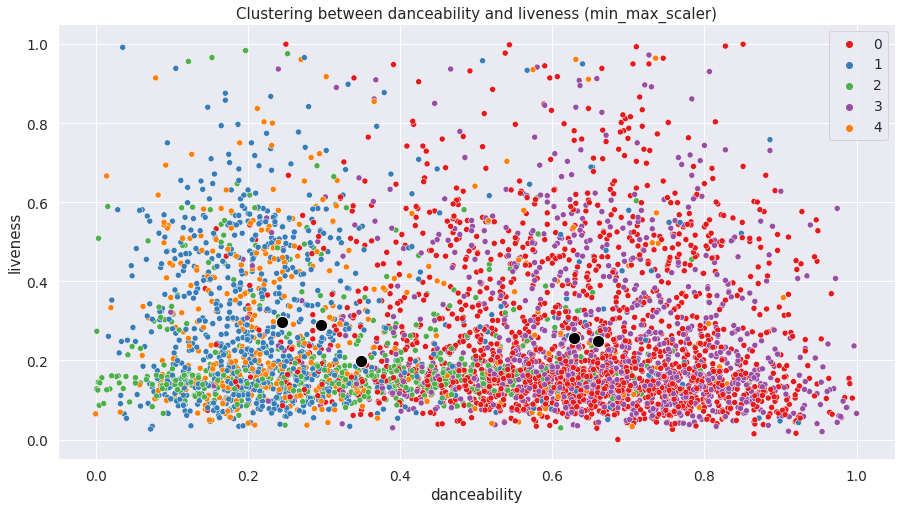

In [123]:
#dancability and liveness graph

fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(data=scaled_audio_df, x='danceability', y='liveness', hue='cluster_new_minmax', palette='Set1')
sns.scatterplot(data=centroids_new_minmax, x='danceability', y='liveness', color='black', s=150)
plt.title("Clustering between danceability and liveness (min_max_scaler)")
plt.show()

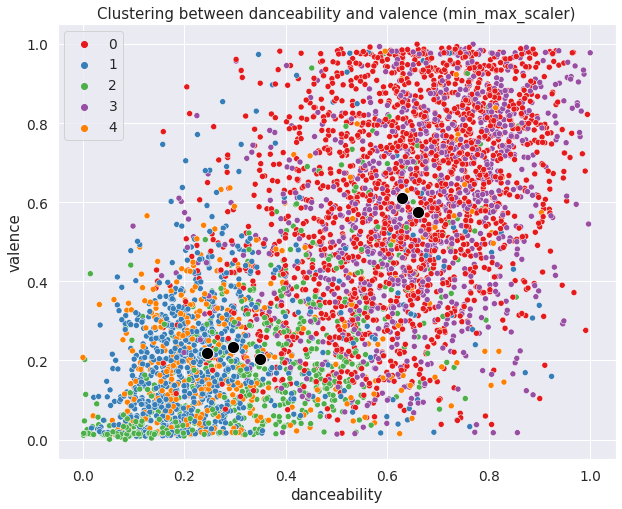

In [124]:
# dancability and valence graph
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(data=scaled_audio_df, x='danceability', y='valence', hue='cluster_new_minmax', palette='Set1')
sns.scatterplot(data=centroids_new_minmax, x='danceability', y='valence', color='black', s=150)
plt.title("Clustering between danceability and valence (min_max_scaler)")
plt.show()

In [125]:
#  checking number of songs in each cluster - minmax scaler
no_of_songs = (
scaled_audio_df.reset_index()
    .groupby(['cluster_new_minmax'])
    .agg({'name':'count'}) 
    .reset_index()
    .sort_values('name', ascending=False)
)
no_of_songs
# renaming the coloumns
no_of_songs.rename(columns = {'name':'model_1', 'no_of_songs':'cluster'}, inplace = True)

no_of_songs

cluster_new_minmax  model_1
0                   0     1823
3                   3     1058
1                   1      815
2                   2      657
4                   4      394

Silhouette score for minmax scaler

In [126]:
from sklearn.metrics import silhouette_score
silhouette_score(df_audio_filtered_minmax, df_audio_filtered_Kmeans_new.labels_)

0.2532479507614185

**Using Standard Scaler**

**Model_2**

In [127]:
# standard scaler
from sklearn.preprocessing import StandardScaler

df_audio_filtered_standard = StandardScaler().fit_transform(df_audio_filtered)
df_audio_filtered_standard
scaled_audio_df_standard = pd.DataFrame(df_audio_filtered_standard, index=df_audio_filtered.index,
             columns=df_audio_filtered.columns)
scaled_audio_df_standard

danceability  \
name                                               artist                                                           
Saudade De Bahia                               ... Antônio Carlos Jobim                                  1.041118   
Mulher Eu Sei                                  ... Chico César                                           0.869606   
Rosa Morena                                    ... Kurt Elling                                           0.619292   
Desafinado                                     ... Stan Getz                                            -0.238268   
Madalena                                       ... Maria Gasolina                                        0.730543   
...                                                                                                           ...   
Elgar: Enigma Variations, Op. 36: XV. EDU (Fina... Edward Elgar                                         -1.721615   
Also sprach Zarathustra, Op.30, TrV 176: Prelud... Richard Strauss                                      -1.865315   
Symphony No. 3 - "Chant de la nuit", Op. 27: La... Karol Szymanowski                                    -1.911669   
Don Giovanni, K.527: Overture                  ... Wolfgang Amadeus Mozart                              -0.590563   
Music for Strings, Percussion and Celesta, BB 1... Béla Bartók                                          -0.609105   

                                                                                                       energy  \
name                                               artist                                                       
Saudade De Bahia                               ... Antônio Carlos Jobim                             -1.001827   
Mulher Eu Sei                                  ... Chico César                                      -2.282372   
Rosa Morena                                    ... Kurt Elling                                      -2.029788   
Desafinado                                     ... Stan Getz                                        -1.930663   
Madalena                                       ... Maria Gasolina                                   -1.706714   
...                                                                                                       ...   
Elgar: Enigma Variations, Op. 36: XV. EDU (Fina... Edward Elgar                                     -1.537835   
Also sprach Zarathustra, Op.30, TrV 176: Prelud... Richard Strauss                                  -1.361613   
Symphony No. 3 - "Chant de la nuit", Op. 27: La... Karol Szymanowski                                -1.618603   
Don Giovanni, K.527: Overture                  ... Wolfgang Amadeus Mozart                          -1.827867   
Music for Strings, Percussion and Celesta, BB 1... Béla Bartók                                      -2.011431   

                                                                                                          key  \
name                                               artist                                                       
Saudade De Bahia                               ... Antônio Carlos Jobim                             -0.910298   
Mulher Eu Sei                                  ... Chico César                                      -0.351753   
Rosa Morena                                    ... Kurt Elling                                       0.206792   
Desafinado                                     ... Stan Getz                                        -0.631026   
Madalena                                       ... Maria Gasolina                                    1.603156   
...                                                                                                       ...   
Elgar: Enigma Variations, Op. 36: XV. EDU (Fina... Edward Elgar                                      0.486065   
Also sprach Zarathustra, Op.30, TrV 176: Prelud... Richard Strauss                          

KMeans(n_clusters=5)


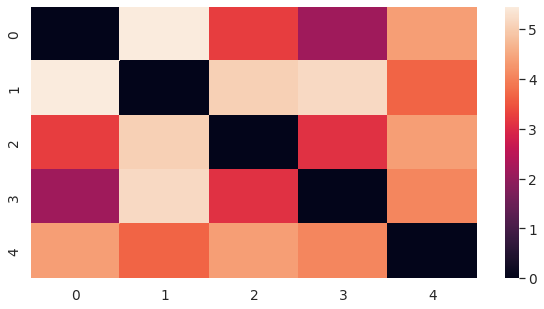

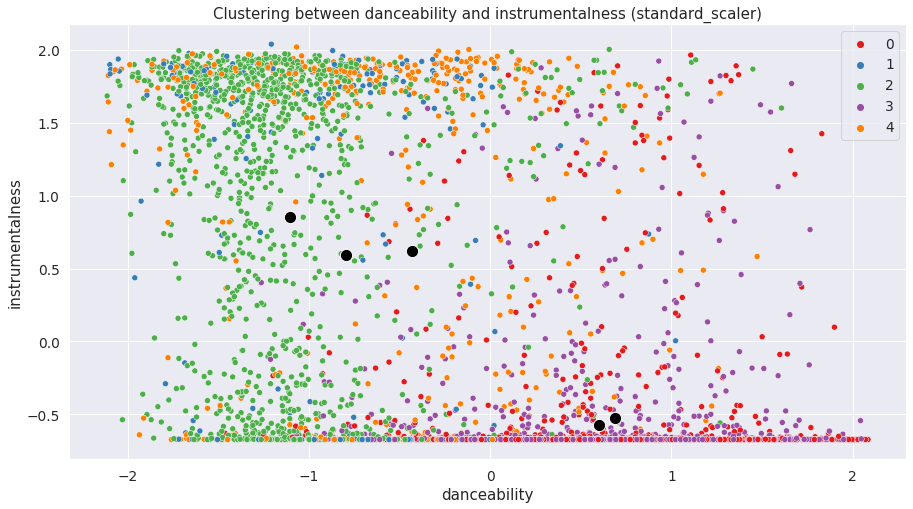

In [128]:
# KMeans standard scaler
from sklearn.cluster import KMeans
df_audio_filtered_Kmeans_standard = KMeans(n_clusters = 5).fit(df_audio_filtered_standard)
print(df_audio_filtered_Kmeans_standard)

scaled_audio_df_standard["cluster_standard"] = df_audio_filtered_Kmeans_standard.labels_
scaled_audio_df_standard.head()

scaled_audio_df_standard.groupby(by="cluster_standard").mean() 

#centroid

columns =  ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']
centroids_standard = df_audio_filtered_Kmeans_standard.cluster_centers_
centroids_standard = pd.DataFrame(centroids_standard)
centroids_standard.columns = columns
centroids_standard.head()

# Euclidean (by default)
euclidean_distance_standard = pd.DataFrame(pairwise_distances(centroids_standard), index=centroids_standard.index,
                                  columns=centroids_standard.index)


fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(euclidean_distance_standard)


# dancability and mode -standard graph
fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(data=scaled_audio_df_standard, x='danceability', y='instrumentalness', hue='cluster_standard', palette='Set1')
sns.scatterplot(data=centroids_standard, x='danceability', y='instrumentalness', color='black', s=150)
plt.title("Clustering between danceability and instrumentalness (standard_scaler)")
plt.show()

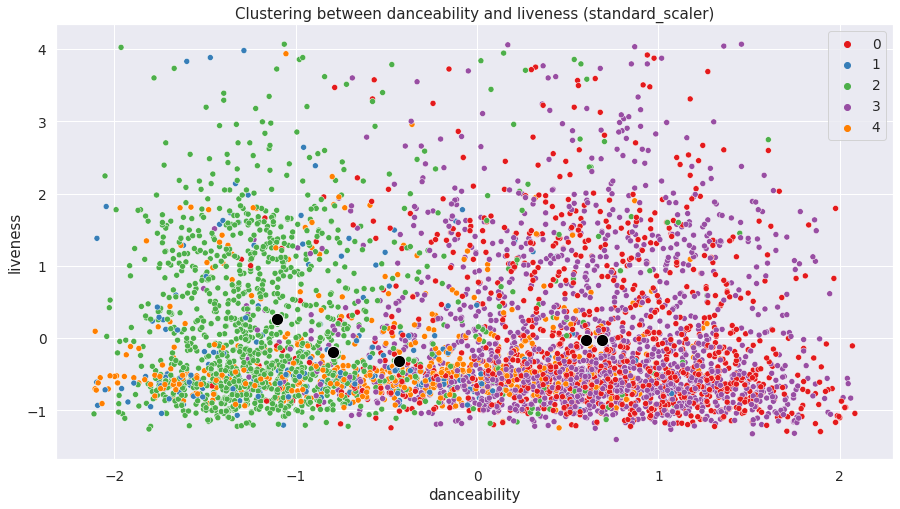

In [129]:
# dancability and liveness - standard scaler 
fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(data=scaled_audio_df_standard, x='danceability', y='liveness', hue='cluster_standard', palette='Set1')
sns.scatterplot(data=centroids_standard, x='danceability', y='liveness', color='black', s=150)
plt.title("Clustering between danceability and liveness (standard_scaler)")
plt.show()

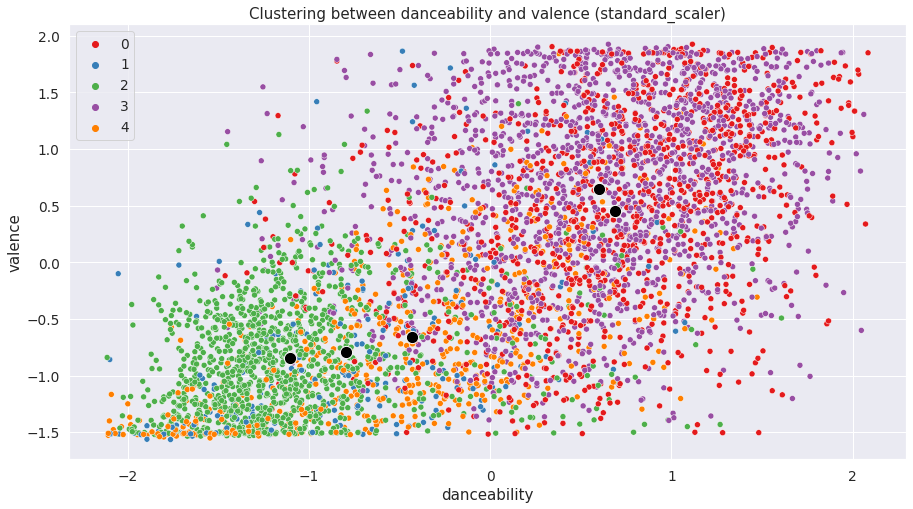

In [130]:
#dancability and valence - standard scaler 
fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(data=scaled_audio_df_standard, x='danceability', y='valence', hue='cluster_standard', palette='Set1')
sns.scatterplot(data=centroids_standard, x='danceability', y='valence', color='black', s=150)
plt.title("Clustering between danceability and valence (standard_scaler)")
plt.show()

In [131]:
# checking number of songs in each cluster-Standard Scaler
no_of_songs_standard= (
scaled_audio_df_standard.reset_index()
    .groupby(['cluster_standard'])
    .agg({'name':'count'}) 
    .reset_index()
    .sort_values('name', ascending=False)
  
)

# renaming the coloumns
no_of_songs_standard.rename(columns = {'name':'model_2', 'no_of_songs':'cluster'}, inplace = True)

no_of_songs_standard

cluster_standard  model_2
3                 3     1693
2                 2     1167
0                 0     1042
4                 4      613
1                 1      232

Silhoutte scores for standard scaler

In [132]:
from sklearn.metrics import silhouette_score
silhouette_score(df_audio_filtered_standard, df_audio_filtered_Kmeans_standard.labels_)

0.1484586513627321

**Using Robust Scaler**

**Model_3**

In [133]:
df_audio_features_robust = df_audio_features
# for robust scaler
from sklearn.preprocessing import RobustScaler
df_audio_filtered_robust = RobustScaler().fit_transform(df_audio_features_robust)
scaled_audio_df_robust = pd.DataFrame(df_audio_filtered_robust, index=df_audio_features.index,
             columns=df_audio_features.columns)
scaled_audio_df_robust

danceability  \
name                                               artist                                                           
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                          0.313984   
Saudade De Bahia                               ... Antônio Carlos Jobim                                  0.535620   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                      0.823219   
Mulher Eu Sei                                  ... Chico César                                           0.437995   
Rosa Morena                                    ... Kurt Elling                                           0.295515   
...                                                                                                           ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                             -0.889182   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                       -0.926121   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold Schoenberg                                    -1.264908   
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                       -1.071240   
Ravel: Boléro, M. 81                           ... Maurice Ravel                                        -0.488127   

                                                                                                       energy  \
name                                               artist                                                       
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                     -1.157005   
Saudade De Bahia                               ... Antônio Carlos Jobim                             -0.818841   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                 -0.019324   
Mulher Eu Sei                                  ... Chico César                                      -1.661353   
Rosa Morena                                    ... Kurt Elling                                      -1.495169   
...                                                                                                       ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                         -1.614976   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                   -1.538647   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold Schoenberg                                -1.780362   
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                   -1.732367   
Ravel: Boléro, M. 81                           ... Maurice Ravel                                    -1.664976   

                                                                                                          key  \
name                                               artist                                                       
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                      1.000000   
Saudade De Bahia                               ... Antônio Carlos Jobim                             -0.500000   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                 -0.500000   
Mulher Eu Sei                                  ... Chico César                                      -0.166667   
Rosa Morena                                    ... Kurt Elling                                       0.166667   
...                                                                                                       ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                         -0.333333   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                           

KMeans(n_clusters=5)


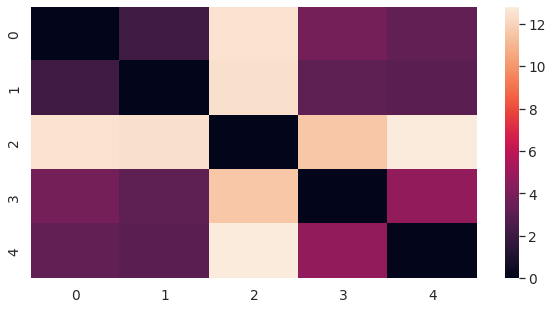

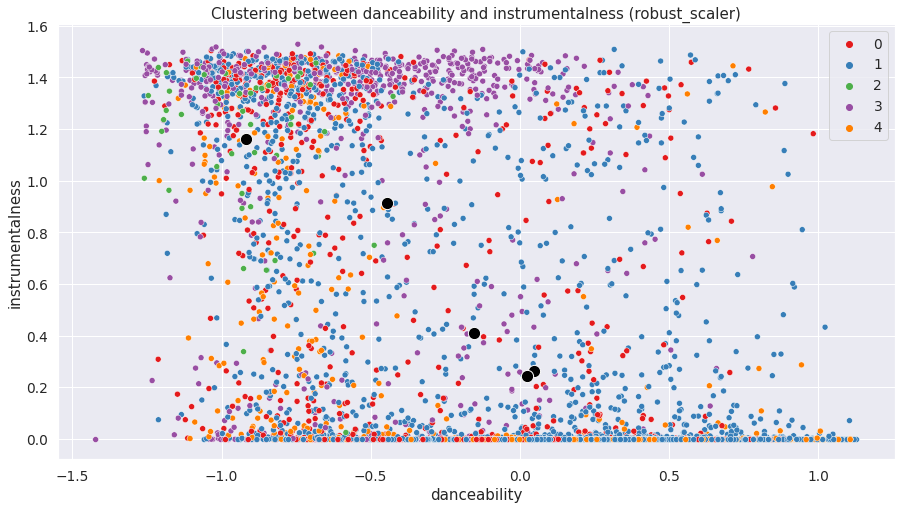

In [134]:
# KMeans standard scaler
from sklearn.cluster import KMeans
df_audio_filtered_Kmeans_robust = KMeans(n_clusters = 5).fit(df_audio_filtered_robust)
print(df_audio_filtered_Kmeans_robust)

scaled_audio_df_robust["cluster_robust"] = df_audio_filtered_Kmeans_robust.labels_
scaled_audio_df_robust.head()


# centroid
columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']
centroids_robust = df_audio_filtered_Kmeans_robust.cluster_centers_
centroids_robust = pd.DataFrame(centroids_robust)
centroids_robust.columns = columns
centroids_robust.head()

# Euclidean (by default)
euclidean_distance_robust = pd.DataFrame(pairwise_distances(centroids_robust), index=centroids_robust.index,
                                  columns=centroids_robust.index)


fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(euclidean_distance_robust)

#dancability and mode -robust graph
fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(data=scaled_audio_df_robust, x='danceability', y='instrumentalness', hue='cluster_robust', palette='Set1')
sns.scatterplot(data=centroids_robust, x='danceability', y='instrumentalness', color='black', s=150)
plt.title("Clustering between danceability and instrumentalness (robust_scaler)")
plt.show()

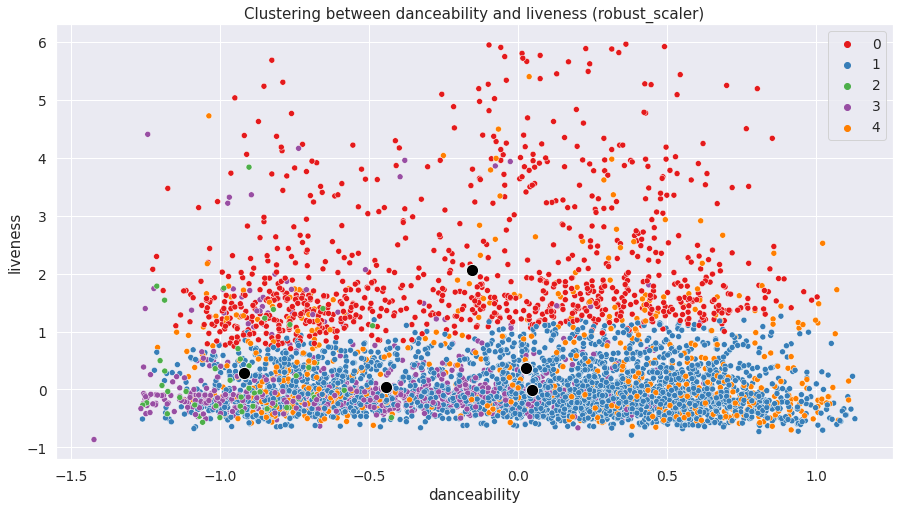

In [135]:
#dancability and liveness - robust graph
fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(data=scaled_audio_df_robust, x='danceability', y='liveness', hue='cluster_robust', palette='Set1')
sns.scatterplot(data=centroids_robust, x='danceability', y='liveness', color='black', s=150)
plt.title("Clustering between danceability and liveness (robust_scaler)")
plt.show()

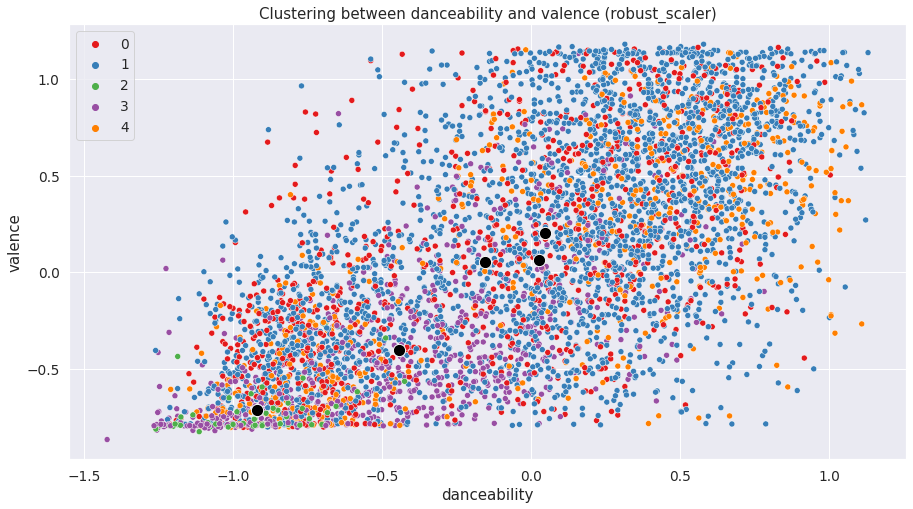

In [136]:
#dancability and valence - robust graph
fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(data=scaled_audio_df_robust, x='danceability', y='valence', hue='cluster_robust', palette='Set1')
sns.scatterplot(data=centroids_robust, x='danceability', y='valence', color='black', s=150)
plt.title("Clustering between danceability and valence (robust_scaler)")
plt.show()

In [137]:
# checking number of songs in each cluster - robust scaler
no_of_songs_robust = (
scaled_audio_df_robust.reset_index()
    .groupby(['cluster_robust'])
    .agg({'name':'count'}) 
    .reset_index()
    .sort_values('name', ascending=False)
)
no_of_songs_robust
# renaming the coloumns
no_of_songs_robust.rename(columns = {'name':'model_3 ', 'cluster_robust':'cluster'}, inplace = True)

no_of_songs_robust

cluster  model_3 
1        1      2826
0        0       929
3        3       831
4        4       600
2        2        49

Silhoutte scores for robust scaler

In [138]:
from sklearn.metrics import silhouette_score
silhouette_score(df_audio_filtered_robust, df_audio_filtered_Kmeans_robust.labels_)

0.19954845122959952

Songs 


In [139]:
cluster_0_songs_minmax = scaled_audio_df.query('cluster_new_minmax == 0')
cluster_0_songs_minmax.head(5)

danceability  \
name                                               artist                                                           
Saudade De Bahia                               ... Antônio Carlos Jobim                                  0.751491   
Brigas Nunca Mais                              ... Paula Morelenbaum                                     0.698476   
Previsao                                       ... Bossacucanova                                         0.676386   
Samba de Verão                                 ... Marcos Valle                                          0.701789   
Nova Bossa Nova                                ... Marcos Valle                                          0.592445   

                                                                                                       energy  \
name                                               artist                                                       
Saudade De Bahia                               ... Antônio Carlos Jobim                              0.398807   
Brigas Nunca Mais                              ... Paula Morelenbaum                                 0.546099   
Previsao                                       ... Bossacucanova                                     0.864731   
Samba de Verão                                 ... Marcos Valle                                      0.404819   
Nova Bossa Nova                                ... Marcos Valle                                      0.739483   

                                                                                                          key  \
name                                               artist                                                       
Saudade De Bahia                               ... Antônio Carlos Jobim                              0.181818   
Brigas Nunca Mais                              ... Paula Morelenbaum                                 0.909091   
Previsao                                       ... Bossacucanova                                     0.090909   
Samba de Verão                                 ... Marcos Valle                                      0.000000   
Nova Bossa Nova                                ... Marcos Valle                                      0.727273   

                                                                                                     loudness  \
name                                               artist                                                       
Saudade De Bahia                               ... Antônio Carlos Jobim                              0.526649   
Brigas Nunca Mais                              ... Paula Morelenbaum                                 0.567054   
Previsao                                       ... Bossacucanova                                     0.684850   
Samba de Verão                                 ... Marcos Valle                                      0.460966   
Nova Bossa Nova                                ... Marcos Valle                                      0.595817   

                                                                                                     mode  \
name                                               artist                                                   
Saudade De Bahia                               ... Antônio Carlos Jobim                               1.0   
Brigas Nunca Mais                              ... Paula Morelenbaum                                  1.0   
Previsao                                       ... Bossacucanova                                      1.0   
Samba de Verão                                 ... Marcos Valle                                       1.0   
Nova Bossa Nova                                ... Marcos Valle                                       1.0   

                                                                                                     speechiness  \
name                     

In [140]:
cluster_1_songs_minmax = scaled_audio_df.query('cluster_new_minmax == 1')
cluster_1_songs_minmax.head(5)

danceability  \
name                                               artist                                                           
Under Your Spell                               ... Desire                                                0.563729   
La Nueva Reconquista de Graná                  ... Grupo De Expertos Solynieve                           0.184891   
Que No Sea Kang, Por Favor                     ... Los Planetas                                          0.412414   
Your Fucking Sunny Day                         ... Lambchop                                              0.350563   
San Francisco                                  ... Foxygen                                               0.308593   

                                                                                                       energy  \
name                                               artist                                                       
Under Your Spell                               ... Desire                                            0.599204   
La Nueva Reconquista de Graná                  ... Grupo De Expertos Solynieve                       0.640286   
Que No Sea Kang, Por Favor                     ... Los Planetas                                      0.493996   
Your Fucking Sunny Day                         ... Lambchop                                          0.491992   
San Francisco                                  ... Foxygen                                           0.552111   

                                                                                                          key  \
name                                               artist                                                       
Under Your Spell                               ... Desire                                            0.727273   
La Nueva Reconquista de Graná                  ... Grupo De Expertos Solynieve                       0.818182   
Que No Sea Kang, Por Favor                     ... Los Planetas                                      0.181818   
Your Fucking Sunny Day                         ... Lambchop                                          0.000000   
San Francisco                                  ... Foxygen                                           0.727273   

                                                                                                     loudness  \
name                                               artist                                                       
Under Your Spell                               ... Desire                                            0.609759   
La Nueva Reconquista de Graná                  ... Grupo De Expertos Solynieve                       0.705492   
Que No Sea Kang, Por Favor                     ... Los Planetas                                      0.648946   
Your Fucking Sunny Day                         ... Lambchop                                          0.702447   
San Francisco                                  ... Foxygen                                           0.599168   

                                                                                                     mode  \
name                                               artist                                                   
Under Your Spell                               ... Desire                                             1.0   
La Nueva Reconquista de Graná                  ... Grupo De Expertos Solynieve                        1.0   
Que No Sea Kang, Por Favor                     ... Los Planetas                                       1.0   
Your Fucking Sunny Day                         ... Lambchop                                           1.0   
San Francisco                                  ... Foxygen                                            1.0   

                                                                                                     speechiness  \
name                     

In [141]:
cluster_2_songs_minmax = scaled_audio_df.query('cluster_new_minmax == 2')
cluster_2_songs_minmax.head(5)

danceability  \
name                                               artist                                                           
Mulher Eu Sei                                  ... Chico César                                           0.710625   
Rosa Morena                                    ... Kurt Elling                                           0.650983   
Desafinado                                     ... Stan Getz                                             0.446653   
Madalena                                       ... Maria Gasolina                                        0.677491   
The Girl From Ipanema                          ... Stan Getz                                             0.639938   

                                                                                                       energy  \
name                                               artist                                                       
Mulher Eu Sei                                  ... Chico César                                       0.049313   
Rosa Morena                                    ... Kurt Elling                                       0.118250   
Desafinado                                     ... Stan Getz                                         0.145303   
Madalena                                       ... Maria Gasolina                                    0.206425   
The Girl From Ipanema                          ... Stan Getz                                         0.139291   

                                                                                                          key  \
name                                               artist                                                       
Mulher Eu Sei                                  ... Chico César                                       0.363636   
Rosa Morena                                    ... Kurt Elling                                       0.545455   
Desafinado                                     ... Stan Getz                                         0.272727   
Madalena                                       ... Maria Gasolina                                    1.000000   
The Girl From Ipanema                          ... Stan Getz                                         0.727273   

                                                                                                     loudness  \
name                                               artist                                                       
Mulher Eu Sei                                  ... Chico César                                       0.341579   
Rosa Morena                                    ... Kurt Elling                                       0.284322   
Desafinado                                     ... Stan Getz                                         0.362390   
Madalena                                       ... Maria Gasolina                                    0.486921   
The Girl From Ipanema                          ... Stan Getz                                         0.386417   

                                                                                                     mode  \
name                                               artist                                                   
Mulher Eu Sei                                  ... Chico César                                        1.0   
Rosa Morena                                    ... Kurt Elling                                        1.0   
Desafinado                                     ... Stan Getz                                          1.0   
Madalena                                       ... Maria Gasolina                                     0.0   
The Girl From Ipanema                          ... Stan Getz                                          1.0   

                                                                                                     speechiness  \
name                     

In [142]:
cluster_3_songs_minmax = scaled_audio_df.query('cluster_new_minmax == 3')
cluster_3_songs_minmax.head(5)

danceability  \
name                                               artist                                                           
Blue Bossa - Remastered                        ... Joe Henderson                                         0.462116   
Aqua De Coco                                   ... Marcos Valle                                          0.765849   
Mas Que Nada                                   ... Rio Combo                                             0.614535   
Chega De Saudade                               ... João Gilberto                                         0.402474   
Rebel Rebel                                    ... Seu Jorge                                             0.787939   

                                                                                                       energy  \
name                                               artist                                                       
Blue Bossa - Remastered                        ... Joe Henderson                                     0.432874   
Aqua De Coco                                   ... Marcos Valle                                      0.732469   
Mas Que Nada                                   ... Rio Combo                                         0.539085   
Chega De Saudade                               ... João Gilberto                                     0.244500   
Rebel Rebel                                    ... Seu Jorge                                         0.205423   

                                                                                                          key  \
name                                               artist                                                       
Blue Bossa - Remastered                        ... Joe Henderson                                     0.454545   
Aqua De Coco                                   ... Marcos Valle                                      0.909091   
Mas Que Nada                                   ... Rio Combo                                         0.454545   
Chega De Saudade                               ... João Gilberto                                     0.363636   
Rebel Rebel                                    ... Seu Jorge                                         0.545455   

                                                                                                     loudness  \
name                                               artist                                                       
Blue Bossa - Remastered                        ... Joe Henderson                                     0.619268   
Aqua De Coco                                   ... Marcos Valle                                      0.629725   
Mas Que Nada                                   ... Rio Combo                                         0.525194   
Chega De Saudade                               ... João Gilberto                                     0.413725   
Rebel Rebel                                    ... Seu Jorge                                         0.424690   

                                                                                                     mode  \
name                                               artist                                                   
Blue Bossa - Remastered                        ... Joe Henderson                                      0.0   
Aqua De Coco                                   ... Marcos Valle                                       0.0   
Mas Que Nada                                   ... Rio Combo                                          0.0   
Chega De Saudade                               ... João Gilberto                                      0.0   
Rebel Rebel                                    ... Seu Jorge                                          0.0   

                                                                                                     speechiness  \
name                     

In [143]:
cluster_4_songs_minmax = scaled_audio_df.query('cluster_new_minmax == 4')
cluster_4_songs_minmax.head(5)

danceability  \
name                                               artist                                                           
Manada                                         ... Bagunço                                               0.650983   
Paranoid Android                               ... Brad Mehldau                                          0.357190   
Shadows                                        ... Au Revoir Simone                                      0.398056   
Oats In The Water                              ... Ben Howard                                            0.333996   
How to Disappear Completely                    ... Radiohead                                             0.117517   

                                                                                                       energy  \
name                                               artist                                                       
Manada                                         ... Bagunço                                           0.484978   
Paranoid Android                               ... Brad Mehldau                                      0.573153   
Shadows                                        ... Au Revoir Simone                                  0.612230   
Oats In The Water                              ... Ben Howard                                        0.474958   
How to Disappear Completely                    ... Radiohead                                         0.301614   

                                                                                                          key  \
name                                               artist                                                       
Manada                                         ... Bagunço                                           0.818182   
Paranoid Android                               ... Brad Mehldau                                      0.636364   
Shadows                                        ... Au Revoir Simone                                  0.272727   
Oats In The Water                              ... Ben Howard                                        0.181818   
How to Disappear Completely                    ... Radiohead                                         0.545455   

                                                                                                     loudness  \
name                                               artist                                                       
Manada                                         ... Bagunço                                           0.565768   
Paranoid Android                               ... Brad Mehldau                                      0.513756   
Shadows                                        ... Au Revoir Simone                                  0.609861   
Oats In The Water                              ... Ben Howard                                        0.635072   
How to Disappear Completely                    ... Radiohead                                         0.560522   

                                                                                                     mode  \
name                                               artist                                                   
Manada                                         ... Bagunço                                            0.0   
Paranoid Android                               ... Brad Mehldau                                       0.0   
Shadows                                        ... Au Revoir Simone                                   0.0   
Oats In The Water                              ... Ben Howard                                         0.0   
How to Disappear Completely                    ... Radiohead                                          0.0   

                                                                                                     speechiness  \
name                     